In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [54]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Test_set.xlsx')
train.replace([np.inf, -np.inf], np.nan, inplace=True) 
  
# Dropping all the rows with nan values 
train.dropna(inplace=True) 

In [55]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


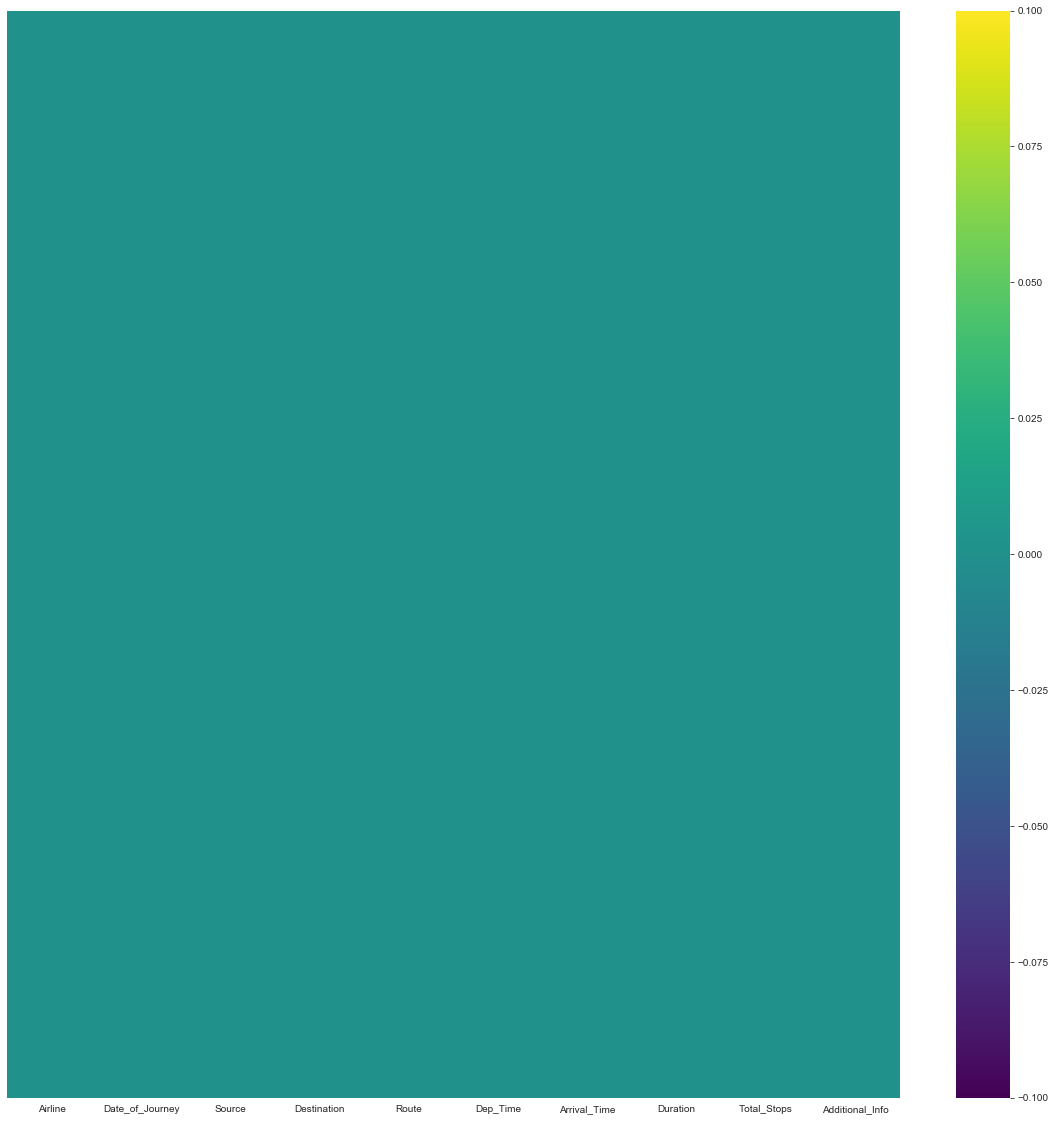

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(test.isnull(),yticklabels = False,cmap='viridis')

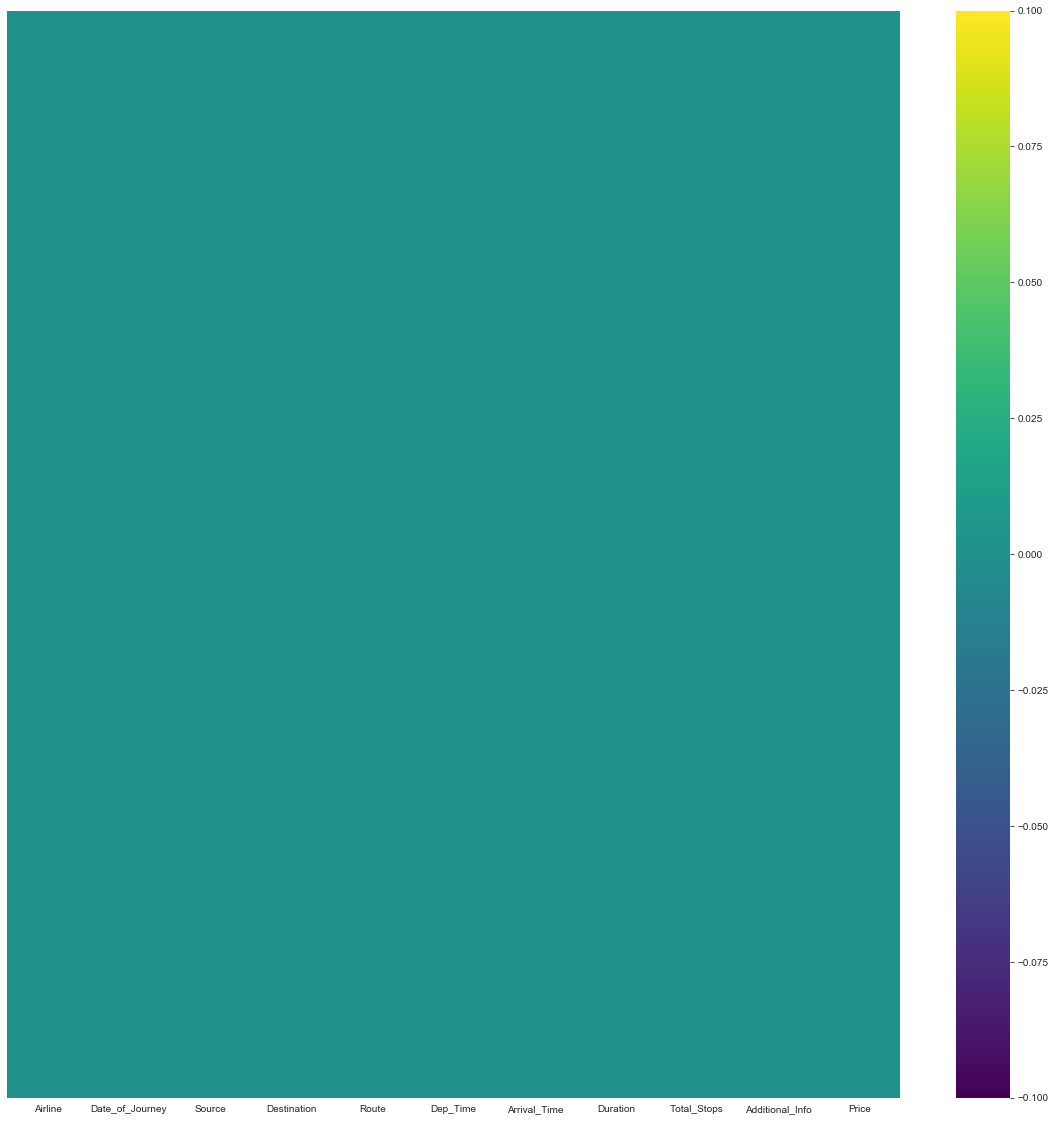

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(train.isnull(),yticklabels = False,cmap='viridis')

In [58]:
train.Airline.head(10)

0               IndiGo
1            Air India
2          Jet Airways
3               IndiGo
4               IndiGo
5             SpiceJet
6          Jet Airways
7          Jet Airways
8          Jet Airways
9    Multiple carriers
Name: Airline, dtype: object

In [59]:
train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

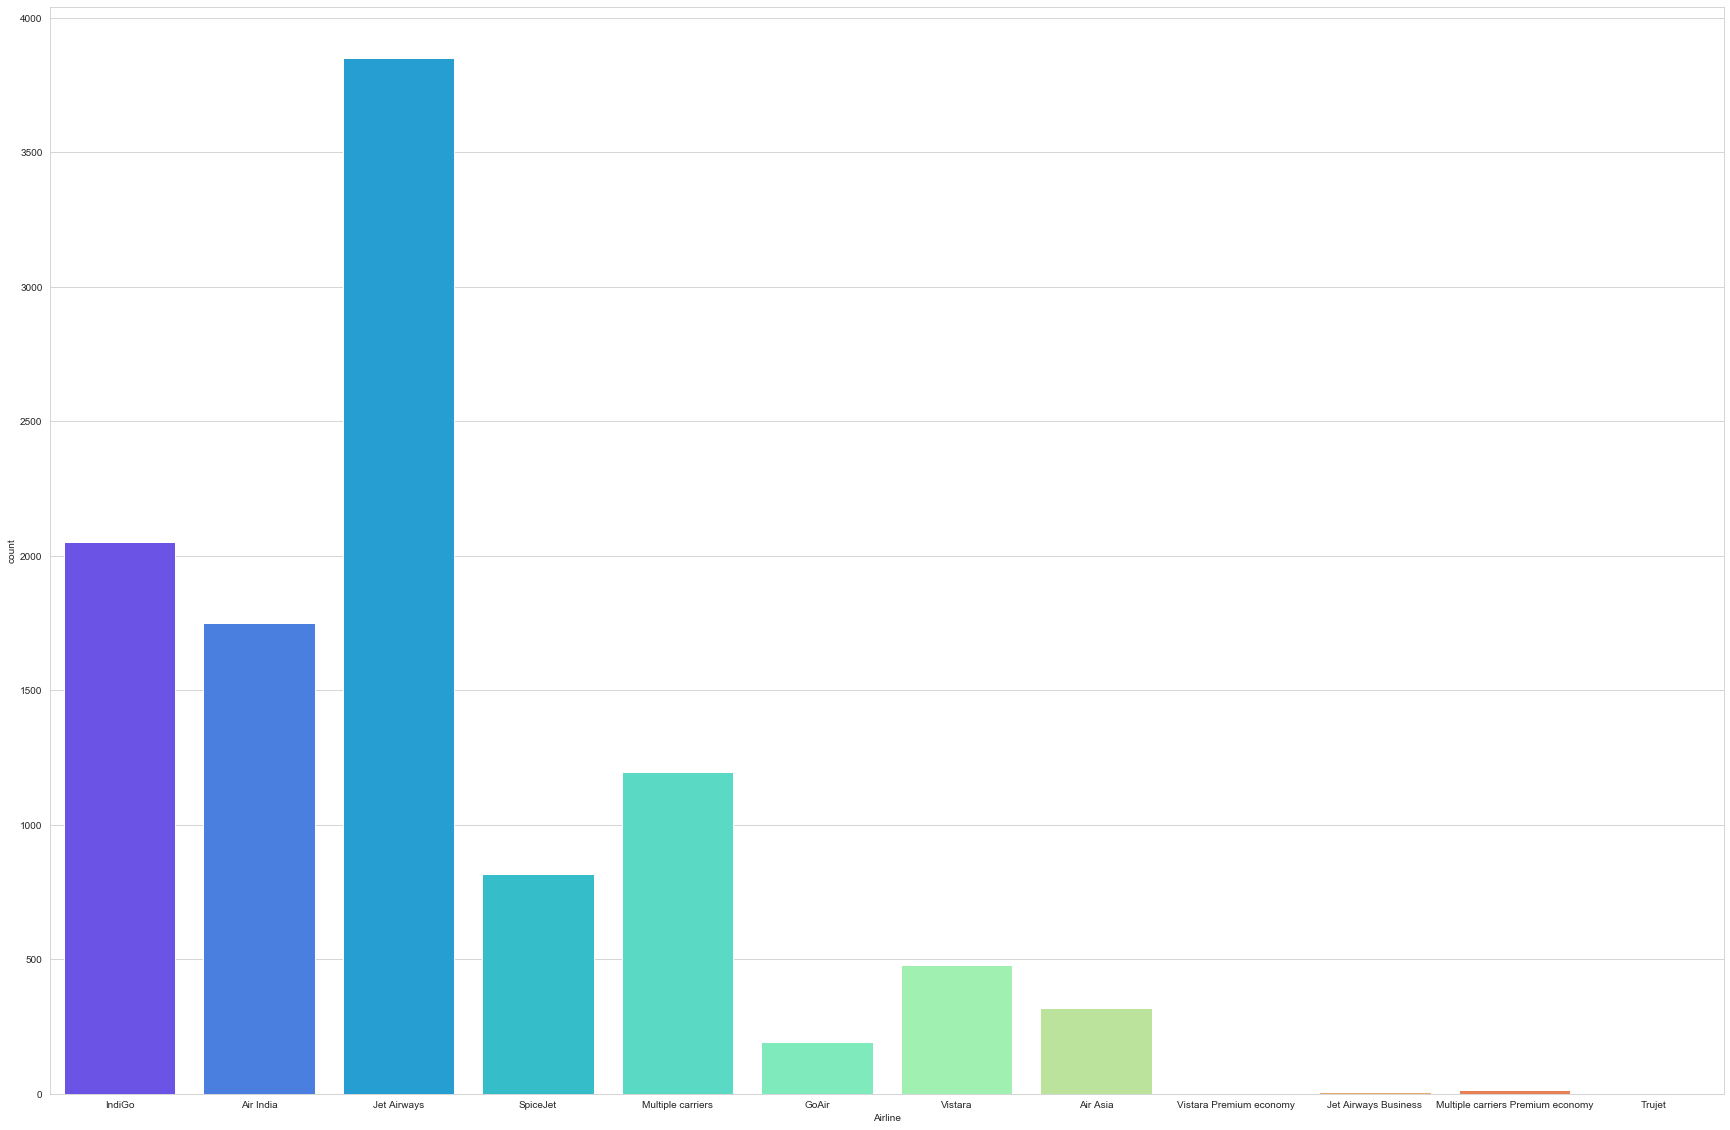

In [60]:
plt.figure(figsize=(30,20))
sns.set_style('whitegrid')
sns.countplot(x='Airline',data=train,palette='rainbow')

In [61]:
train['Arrival_Time'].head(10)

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
5           11:25
6    10:25 13 Mar
7    05:05 02 Mar
8    10:25 13 Mar
9           19:15
Name: Arrival_Time, dtype: object

In [62]:
train["Journey_day"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [63]:
train["Journey_month"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.month

In [64]:
train.drop('Date_of_Journey',axis=1,inplace=True)

In [65]:
train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


<Figure size 2160x1440 with 0 Axes>

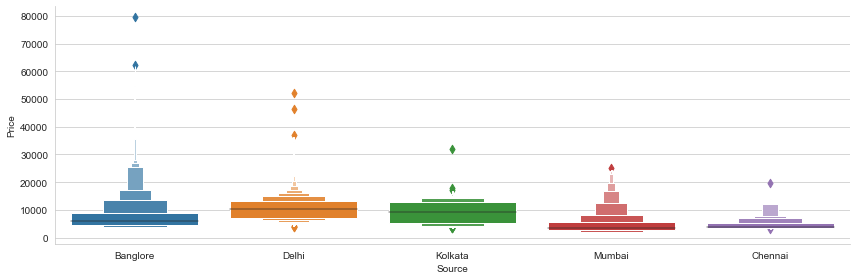

In [66]:
plt.figure(figsize=(30,20))
sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [67]:
train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [68]:
train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3


In [69]:
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [70]:
train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,9,4
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,27,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0,7229,27,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,1,3


In [71]:
train.dtypes

Airline          object
Source           object
Destination      object
Dep_Time         object
Arrival_Time     object
Duration         object
Total_Stops       int64
Price             int64
Journey_day       int64
Journey_month     int64
dtype: object

In [72]:
Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [73]:
Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [74]:
Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [75]:
data_train = pd.concat([train, Airline, Source, Destination], axis = 1)

In [76]:
data_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,1,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,9,4,...,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,27,4,...,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0,7229,27,4,...,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,1,3,...,0,0,0,0,0,0,0,0,0,1


In [77]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [78]:
data_train

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,22:20,01:10 22 Mar,2h 50m,0,3897,24,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,05:50,13:15,7h 25m,2,7662,1,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,09:25,04:25 10 Jun,19h,2,13882,9,6,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,18:05,23:30,5h 25m,1,6218,12,5,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,16:50,21:35,4h 45m,1,13302,1,3,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,19:55,22:25,2h 30m,0,4107,9,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10679,20:45,23:20,2h 35m,0,4145,27,4,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10680,08:20,11:20,3h,0,7229,27,4,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,11:30,14:10,2h 40m,0,12648,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
data_train["Arrival_hour"] = pd.to_datetime(data_train.Arrival_Time).dt.hour

# Extracting Minutes
data_train["Arrival_min"] = pd.to_datetime(data_train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
data_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [80]:
duration = list(data_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

data_train["Duration_hours"] = duration_hours
data_train["Duration_mins"] = duration_mins

In [81]:
data_train.drop(['Duration'],axis=1,inplace = True)
data_train

,Dep_Time,Total_Stops,Price,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,22:20,0,3897,24,3,0,0,1,0,0,...,0,0,0,0,0,1,1,10,2,50
1,05:50,2,7662,1,5,1,0,0,0,0,...,0,0,0,0,0,0,13,15,7,25
2,09:25,2,13882,9,6,0,0,0,1,0,...,0,1,0,0,0,0,4,25,19,0
3,18:05,1,6218,12,5,0,0,1,0,0,...,0,0,0,0,0,0,23,30,5,25
4,16:50,1,13302,1,3,0,0,1,0,0,...,0,0,0,0,0,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,19:55,0,4107,9,4,0,0,0,0,0,...,0,0,0,0,0,0,22,25,2,30
10679,20:45,0,4145,27,4,1,0,0,0,0,...,0,0,0,0,0,0,23,20,2,35
10680,08:20,0,7229,27,4,0,0,0,1,0,...,0,0,1,0,0,0,11,20,3,0
10681,11:30,0,12648,1,3,0,0,0,0,0,...,0,0,0,0,0,1,14,10,2,40


In [82]:
data_train["Dep_hour"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour

# Extracting Minutes
data_train["Dep_min"] = pd.to_datetime(data_train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
data_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [83]:
data_train.shape

(10682, 30)

In [84]:
X = data_train.drop(['Price'],axis=1)
X

,Total_Stops,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Dep_hour,Dep_min
0,0,24,3,0,0,1,0,0,0,0,...,0,0,0,1,1,10,2,50,22,20
1,2,1,5,1,0,0,0,0,0,0,...,0,0,0,0,13,15,7,25,5,50
2,2,9,6,0,0,0,1,0,0,0,...,0,0,0,0,4,25,19,0,9,25
3,1,12,5,0,0,1,0,0,0,0,...,0,0,0,0,23,30,5,25,18,5
4,1,1,3,0,0,1,0,0,0,0,...,0,0,0,1,21,35,4,45,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,0,0,0,0,0,0,0,...,0,0,0,0,22,25,2,30,19,55
10679,0,27,4,1,0,0,0,0,0,0,...,0,0,0,0,23,20,2,35,20,45
10680,0,27,4,0,0,0,1,0,0,0,...,1,0,0,0,11,20,3,0,8,20
10681,0,1,3,0,0,0,0,0,0,0,...,0,0,0,1,14,10,2,40,11,30


In [85]:
Y = data_train['Price'] 

In [86]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [88]:
X_train.dtypes

Total_Stops                                  int64
Journey_day                                  int64
Journey_month                                int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premium economy    uint8
Airline_SpiceJet                             uint8
Airline_Trujet                               uint8
Airline_Vistara                              uint8
Airline_Vistara Premium economy              uint8
Source_Chennai                               uint8
Source_Delhi                                 uint8
Source_Kolkata                               uint8
Source_Mumbai                                uint8
Destination_Cochin                           uint8
Destination_Delhi              

        Applying Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,Y_train)
linear.score(X_test,Y_test)

0.6250652013374361

Random Forest Regression

In [92]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [94]:
reg_rf.score(X_test, Y_test)

0.8023851747921449

In [95]:
y_hat = reg_rf.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test, y_hat)))

1991.687590177189
